In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans




In [3]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


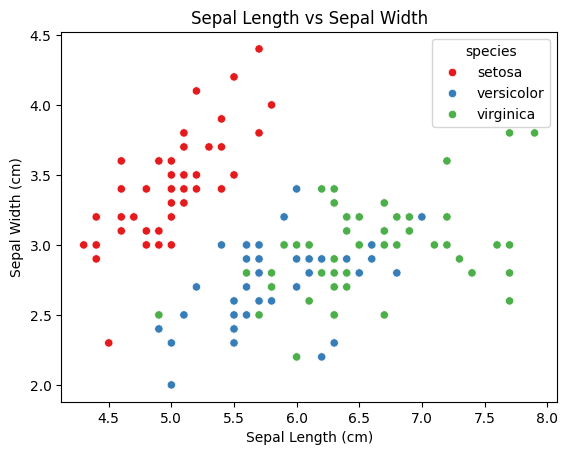

In [4]:
iris_df['species'] = iris.target

iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
clf = LogisticRegression(random_state=52)
clf.fit(X_train_scaled, y_train)

LogisticRegression(random_state=52)

In [9]:
y_pred = clf.predict(X_test_scaled)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [11]:
print("Accuracy:", round(accuracy*100,2),"%")
print("Precision:",round(precision*100,2),"%" )
print("Recall:", round(recall*100,2),"%")
print("F1 Score:", round(f1*100,2),"%")

Accuracy: 97.78 %
Precision: 97.44 %
Recall: 97.62 %
F1 Score: 97.43 %


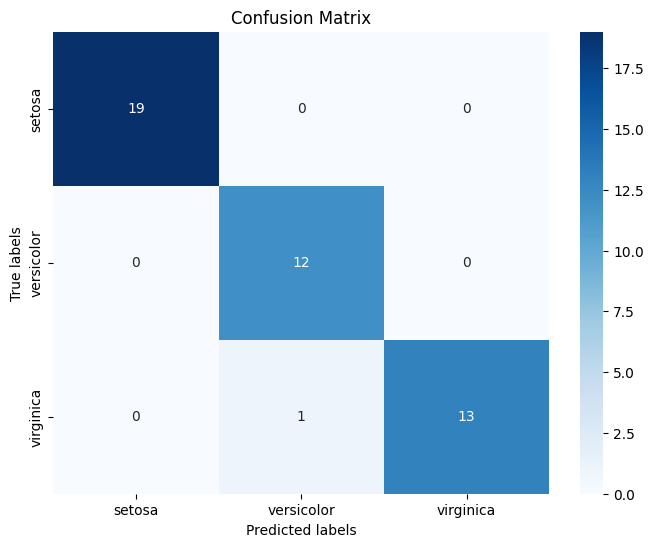

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

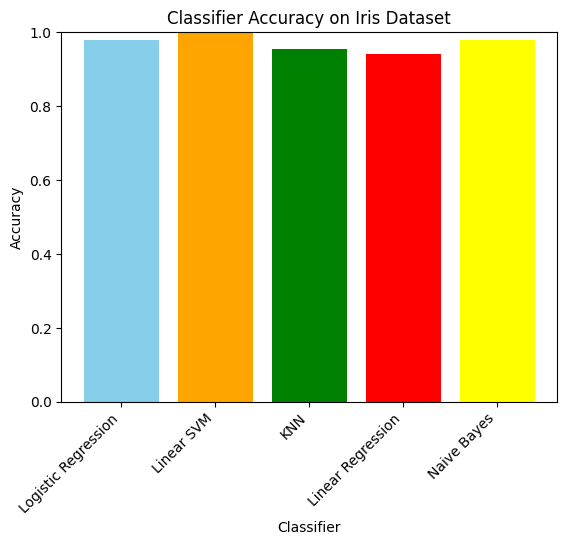

In [24]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Linear SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Linear Regression': LinearRegression(),
    'Naive Bayes': GaussianNB()
}
sorted_classifiers = dict(sorted(classifiers.items()))

accuracies = {}
for name, clf in sorted_classifiers.items():
    clf.fit(X_train_scaled, y_train)
    accuracies[name] = clf.score(X_test_scaled, y_test)

classifiers = ['Logistic Regression', 'Linear SVM', 'KNN', 'Linear Regression', 'Naive Bayes']
classifier_colors = {
    'Logistic Regression': 'skyblue',
    'Linear SVM': 'orange',
    'KNN': 'green',
    'Linear Regression': 'red',
    'Naive Bayes': 'yellow'
}

plt.bar(classifiers, [accuracies[classifier] for classifier in classifiers], color=[classifier_colors[classifier] for classifier in classifiers])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy on Iris Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) 
plt.show()


In [19]:
accuracies

{'KNN': 0.9555555555555556,
 'Linear Regression': 0.9412556189938242,
 'Linear SVM': 1.0,
 'Logistic Regression': 0.9777777777777777,
 'Naive Bayes': 0.9777777777777777}